In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [10]:
company = pd.read_csv('C:\\Users\\Admin\\Downloads\\Company_Data.csv')

In [11]:
company.reset_index()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [13]:
company.Sales.mean()

7.496325

In [14]:
company["sales"]="<=7.5"
company.loc[company["Sales"]>=7.5,"sales"]="High Sales"
company.loc[company["Sales"]<=7.5,"sales"]="Low Sales"

In [15]:
company=company.drop(["Sales"],axis=1)

In [16]:
colnames=list(company.columns)
X=colnames[:10]
Y=colnames[10]

In [17]:
le=LabelEncoder()
select_columns=["ShelveLoc","Urban","US","sales"]
le.fit(company[select_columns].values.flatten())
company[select_columns]=company[select_columns].apply(le.fit_transform)

In [18]:
train,test=train_test_split(company,test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
train_model=model.fit(train[X],train[Y])
train_pred=train_model.predict(train[X])


In [21]:
pd.crosstab(train[Y],train_pred) 

col_0,0,1
sales,,
0,128,13
1,55,84


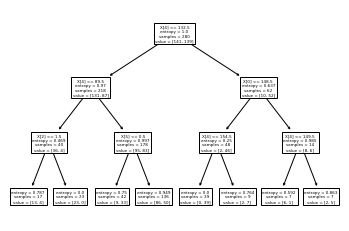

In [22]:
tree.plot_tree(model);

In [33]:
train_accu=np.mean(train.sales==model.predict(train[X]))
train_accu

0.6357142857142857

In [34]:
train_crosstab=pd.crosstab(train[Y],train_pred)
train_crosstab

col_0,0,1
sales,,
0,128,13
1,55,84


In [35]:
test_model=model.fit(test[X],test[Y])
test_pred=test_model.predict(test[X])
test_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [36]:
test_accu=np.mean(test.sales==model.predict(test[X]))
test_accu

0.7666666666666667

In [37]:
test_crosstab=pd.crosstab(test[Y],test_pred)

test_crosstab

col_0,0,1
sales,,
0,35,22
1,6,57
